In [1]:
import pickle
import numpy as np
import collections
import matplotlib.pyplot as plt
import copy

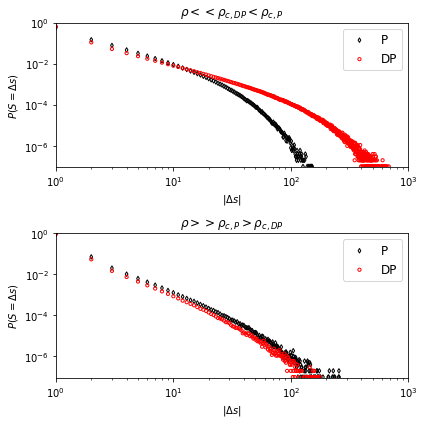

In [2]:
grid_size = 1024
densities = [0.45,0.68]
replicates = [1,2,3,4,5]
numbers_per_replicate = 2000000

strings = ['$\\rho << \\rho_{c,DP} < \\rho_{c,P}$','$\\rho >> \\rho_{c,P} > \\rho_{c,DP}$']

plt.figure(figsize=(6,6))
i = 1
for density in densities:
    dpt = []
    npt = []
    for replicate in replicates:
        filename_dp = "dp_transformations_" + str(grid_size) + "_" + str(density) + "_" + str(numbers_per_replicate) + "_" + str(replicate) + ".txt"
        filename_np = "np_transformations_" + str(grid_size) + "_" + str(density) + "_" + str(numbers_per_replicate) + "_" + str(replicate) + ".txt"
        with open(filename_dp) as f:
            dpt.extend([tuple(map(int, i.split(' '))) for i in f])
        with open(filename_np) as f:
            npt.extend([tuple(map(int, i.split(' '))) for i in f])

    npscs = [abs(i[1]-i[0]) for i in npt]
    npsc_freqs = dict(collections.Counter(npscs))
    npsc_freqs = {k: v / (len(npscs)) for k, v in npsc_freqs.items()}

    dpscs = [abs(i[1]-i[0]) for i in dpt]
    dpsc_freqs = dict(collections.Counter(dpscs))
    dpsc_freqs = {k: v / (len(dpscs)) for k, v in dpsc_freqs.items()}

    np_lists = sorted(npsc_freqs.items()) 
    dp_lists = sorted(dpsc_freqs.items()) 

    npsc_x, npsc_y = zip(*np_lists)
    dpsc_x, dpsc_y = zip(*dp_lists)
    
    ax1 = plt.subplot(2,1,i)
    ax1.scatter(npsc_x, npsc_y,s=10,marker='d',label='P',color='black',facecolors='none')
    ax1.scatter(dpsc_x, dpsc_y,s=10,marker='o',label='DP',color='red',facecolors='none')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_ylim(9*10**(-8),10**(0))
    ax1.set_xlim(1,1000)
    ax1.legend(fontsize=12)
    ax1.set_xlabel('$|\Delta s|$')
    ax1.set_ylabel('$P (S=\Delta s)$')
    ax1.set_title(strings[i-1])
    
    i += 1

plt.tight_layout()
#plt.savefig('Figure_3',dpi = 300)